In [1]:
import os
import numpy as np
import pickle as pc
import tensorflow as tf
from utils import *

from Encoder import *
from Decoder import *
from GRU import *
from LSTM import *

In [2]:
LBNL_DATA_DIR = 'data/LBNL Building 74/lbnlb74electricity.xlsx'
horizon_size = 4
best_loss = 100000000.0
lr = 0.0001
batch_size = 1
max_patience = 15
max_epochs = 100
checkpoint_dir = 'gru_checkpoint'
LOG_INTERVAL = 200
keep_rate = 0.5
hidden_unit = 32

debug = False

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
def show_plot(time_step, gru_pred, lstm_pred, true, title):
    import matplotlib as mpl
    import matplotlib.pylab as plt
    %matplotlib inline
    
    marker = ['b-', 'r-', 'y-']
    
    fig = plt.figure()
    plt.figure(figsize=(30, 10))
    plt.title(title)
    plt.plot(time_step, true, marker[0], label='True')
    plt.plot(time_step, lstm_pred, marker[1], label='2-LSTM-4-16')
    plt.plot(time_step, gru_pred, marker[2], label='2-GRU-4-16')
    plt.legend()
    plt.xlabel('Time-step')
    plt.ylabel("RMSE")
    plt.show()
    
    return plt, fig

In [4]:
with open('gru2_pred_4_16', 'rb') as f:
    gru_pred = pc.load(f)
with open('lstm2_pred_4_16', 'rb') as f:
    lstm_pred = pc.load(f)

In [5]:
idx = 5000

<Figure size 432x288 with 0 Axes>

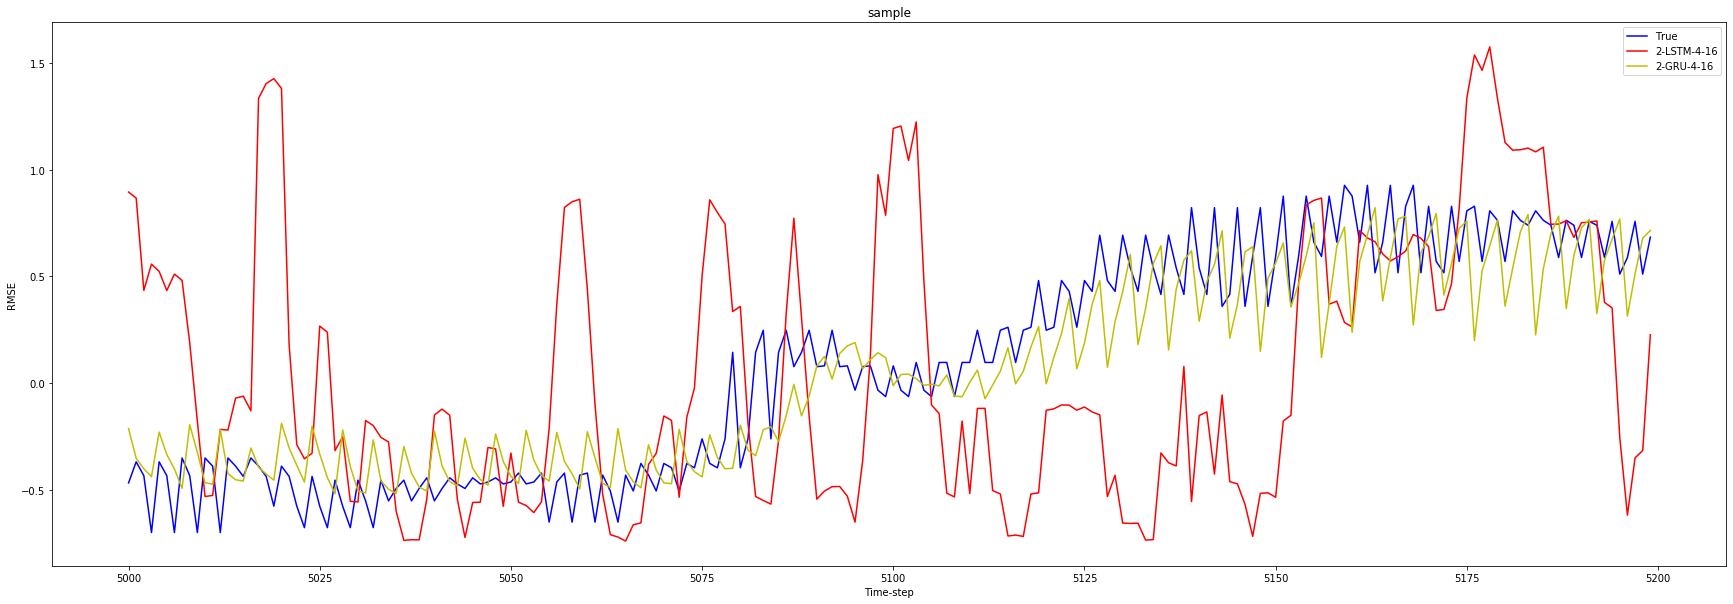

In [6]:
plt, fig = show_plot(gru_pred[0][idx:idx+200], gru_pred[2][idx:idx+200], lstm_pred[2][idx:idx+200], gru_pred[1][idx:idx+200], title='sample')

In [8]:
fig.savefig('result.png')